In [1]:
import random
import matplotlib.pyplot as plt

In [2]:
def fitness(chromosome):
    a, b, c, d, e, f, g, h = chromosome
    return (a + b) - (c + d) + (e + f) - (g + h)

In [3]:
def input_population():
    print("Enter 4 individuals as 8-digit chromosome (digits separated by space):")
    population = []
    for i in range(4):
        while True:
            try:
                line = input(f"Individual {i+1}: ")
                genes = list(map(int, line.strip().split()))
                if len(genes) != 8 or any(g < 0 or g > 9 for g in genes):
                    raise ValueError
                population.append(genes)
                break
            except:
                print("Invalid input. Please enter 8 digits between 0-9.")
    return population

In [4]:
def evaluate_population(population):
    evaluated = [(chrom, fitness(chrom)) for chrom in population]
    evaluated.sort(key=lambda x: x[1], reverse=True)
    return evaluated

In [5]:
def crossover(parent1, parent2, point=4):
    child1 = parent1[:point] + parent2[point:]
    child2 = parent2[:point] + parent1[point:]
    return child1, child2

In [6]:
def mutate(chromosome, mutation_rate=0.1):
    mutated = chromosome[:]
    for i in range(len(mutated)):
        if random.random() < mutation_rate:
            mutated[i] = random.randint(0, 9)
    return mutated

In [7]:
population = input_population()

Enter 4 individuals as 8-digit chromosome (digits separated by space):
Individual 1: 1 1 3 0 6 8 1 0
Individual 2: 0 1 1 5 9 7 6 2 
Individual 3: 5 8 8 6 1 0 0 1
Individual 4: 3 6 9 0 9 0 3 1 


In [8]:
evaluated = evaluate_population(population)
print("\n📊 Fitness Evaluation:")
for i, (chrom, fit) in enumerate(evaluated):
    print(f"Individual {i+1}: {chrom} -> Fitness: {fit}")


📊 Fitness Evaluation:
Individual 1: [1, 1, 3, 0, 6, 8, 1, 0] -> Fitness: 12
Individual 2: [3, 6, 9, 0, 9, 0, 3, 1] -> Fitness: 5
Individual 3: [0, 1, 1, 5, 9, 7, 6, 2] -> Fitness: 3
Individual 4: [5, 8, 8, 6, 1, 0, 0, 1] -> Fitness: -1


In [9]:
print("\n🔀 Crossover:")
parent1, parent2 = evaluated[0][0], evaluated[1][0]
child1, child2 = crossover(parent1, parent2)
print(f"Parent 1: {parent1}")
print(f"Parent 2: {parent2}")
print(f"Child 1: {child1}")
print(f"Child 2: {child2}")


🔀 Crossover:
Parent 1: [1, 1, 3, 0, 6, 8, 1, 0]
Parent 2: [3, 6, 9, 0, 9, 0, 3, 1]
Child 1: [1, 1, 3, 0, 9, 0, 3, 1]
Child 2: [3, 6, 9, 0, 6, 8, 1, 0]


In [10]:
print("\n🧬 Mutation (10% chance per gene):")
mutated1 = mutate(child1)
mutated2 = mutate(child2)
print(f"Mutated Child 1: {mutated1}")
print(f"Mutated Child 2: {mutated2}")


🧬 Mutation (10% chance per gene):
Mutated Child 1: [1, 3, 3, 0, 9, 0, 3, 1]
Mutated Child 2: [3, 6, 6, 0, 6, 8, 1, 0]


In [11]:
all_individuals = evaluated + [(child1, fitness(child1)), (child2, fitness(child2)),
                               (mutated1, fitness(mutated1)), (mutated2, fitness(mutated2))]
max_fit = max(all_individuals, key=lambda x: x[1])
print(f"\n🏆 Maximum Fitness: {max_fit[1]} from Individual: {max_fit[0]}")


🏆 Maximum Fitness: 16 from Individual: [3, 6, 6, 0, 6, 8, 1, 0]


In [12]:
def run_genetic_algorithm(pop, generations=10):
    fitness_history = []

    for gen in range(generations):
        print(f"\n📊 Generation {gen + 1} Fitness Evaluation:")
        evaluated = evaluate_population(pop)

        for i, (chrom, fit) in enumerate(evaluated):
            print(f"Individual {i+1}: {chrom} -> Fitness: {fit}")

        best_fit = evaluated[0]
        print(f"✅ Best Fit in Gen {gen + 1}: {best_fit[0]} with Fitness = {best_fit[1]}")
        fitness_history.append(best_fit[1])

        # Select top 2 for crossover
        parent1, parent2 = evaluated[0][0], evaluated[1][0]
        child1, child2 = crossover(parent1, parent2)

        # Mutate children
        child1 = mutate(child1)
        child2 = mutate(child2)

        # Form new population: keep top 2 + 2 new children
        pop = [parent1, parent2, child1, child2]

    return fitness_history

In [13]:
fitness_progress = run_genetic_algorithm(population, generations=10)


📊 Generation 1 Fitness Evaluation:
Individual 1: [1, 1, 3, 0, 6, 8, 1, 0] -> Fitness: 12
Individual 2: [3, 6, 9, 0, 9, 0, 3, 1] -> Fitness: 5
Individual 3: [0, 1, 1, 5, 9, 7, 6, 2] -> Fitness: 3
Individual 4: [5, 8, 8, 6, 1, 0, 0, 1] -> Fitness: -1
✅ Best Fit in Gen 1: [1, 1, 3, 0, 6, 8, 1, 0] with Fitness = 12

📊 Generation 2 Fitness Evaluation:
Individual 1: [3, 6, 9, 0, 6, 8, 1, 0] -> Fitness: 13
Individual 2: [1, 1, 3, 0, 6, 8, 1, 0] -> Fitness: 12
Individual 3: [3, 6, 9, 0, 9, 0, 3, 1] -> Fitness: 5
Individual 4: [1, 1, 4, 0, 9, 0, 3, 1] -> Fitness: 3
✅ Best Fit in Gen 2: [3, 6, 9, 0, 6, 8, 1, 0] with Fitness = 13

📊 Generation 3 Fitness Evaluation:
Individual 1: [3, 6, 9, 0, 6, 8, 1, 0] -> Fitness: 13
Individual 2: [3, 6, 9, 0, 6, 8, 1, 0] -> Fitness: 13
Individual 3: [1, 1, 3, 0, 6, 8, 1, 0] -> Fitness: 12
Individual 4: [1, 1, 3, 0, 6, 8, 1, 0] -> Fitness: 12
✅ Best Fit in Gen 3: [3, 6, 9, 0, 6, 8, 1, 0] with Fitness = 13

📊 Generation 4 Fitness Evaluation:
Individual 1: [3, 6,

<ipython-input-14-b0626dcf0706>:7: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


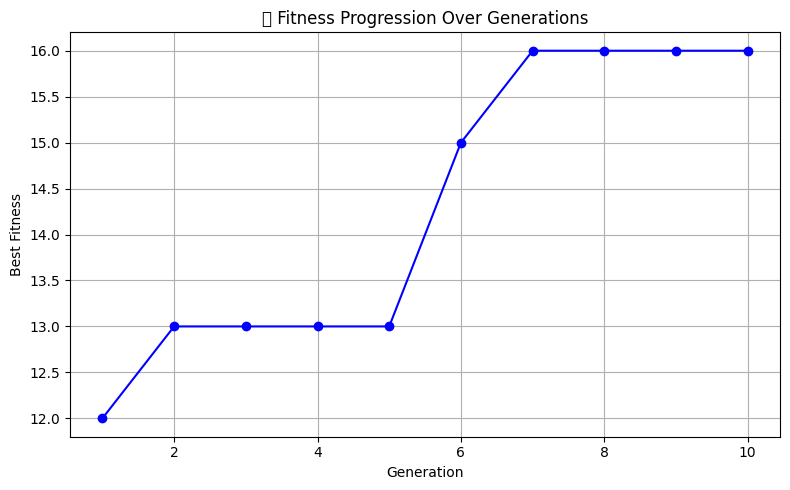

In [14]:
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(fitness_progress)+1), fitness_progress, marker='o', linestyle='-', color='blue')
plt.title("📈 Fitness Progression Over Generations")
plt.xlabel("Generation")
plt.ylabel("Best Fitness")
plt.grid(True)
plt.tight_layout()
plt.show()